In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing, model_selection, metrics

In [ ]:
#Chargement du dataset
df = pd.read_csv('heart.csv')
#Affichage des informations
print("Dimension:",df.shape)
print("Colonnes:",df.columns)
print("Infos:",df.info())

Dimension: (1025, 14)
Colonnes: Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
Infos: None


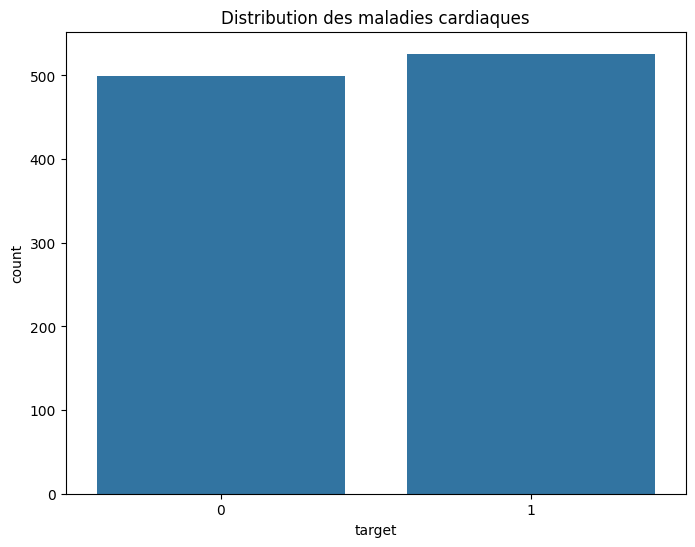

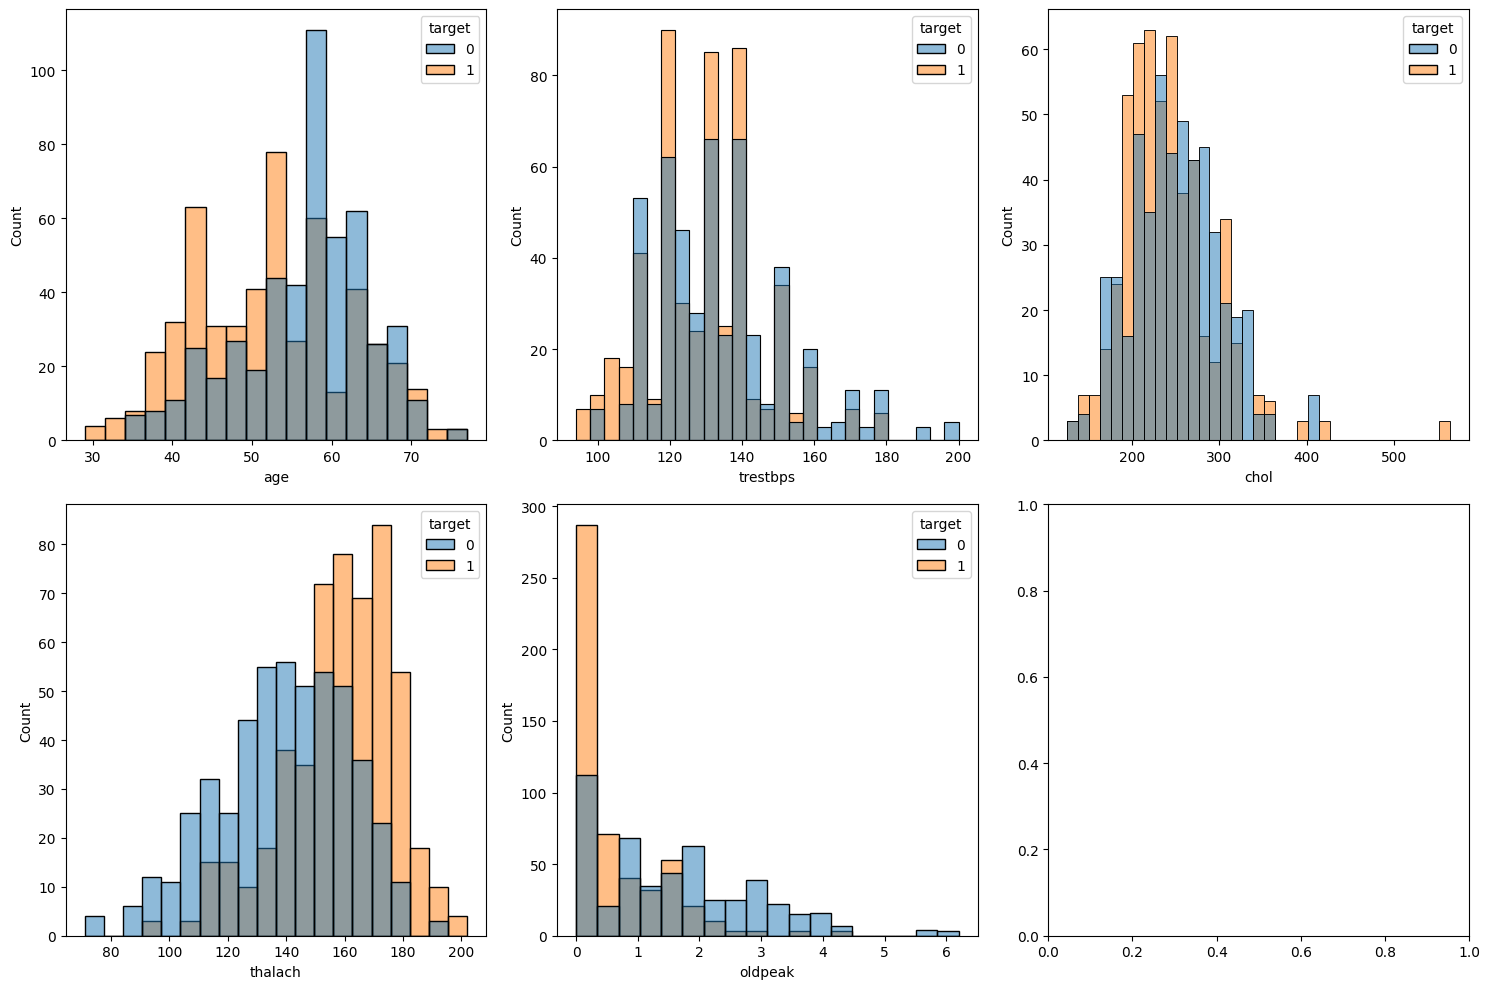

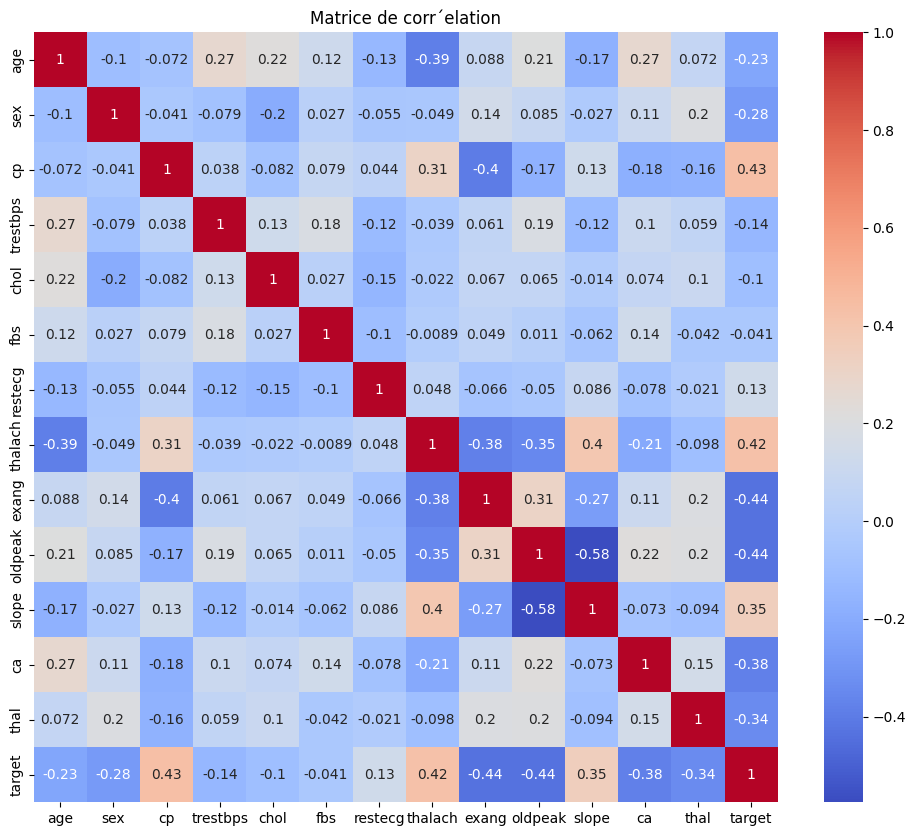

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='target')
plt.title('Distribution des maladies cardiaques')
plt.show()
#Distribution des variables num´eriques
fig, axes = plt.subplots(2, 3,figsize=(15, 10))
numeric_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
for ax, col in zip(axes.flat, numeric_cols):
  sns.histplot(data=df, x=col, hue='target',ax=ax)
plt.tight_layout()
plt.show()
#Matrice de corr´elation
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True,cmap='coolwarm')
plt.title('Matrice de corr´elation')
plt.show()

Valeurs manquantes par colonne:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Nombre de doublons: 723

Statistiques descriptives:
               age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.00000   
std       9.072290     0.460373     1.029641    17.516718    51.59251   
min      29.000000     0.000000     0.000000    94.000000   126.00000   
25%      48.000000     0.000000     0.000000   120.000000   211.00000   
50%      56.000000     1.000000     1.000000   130.000000   240.00000   
75%      61.000000     1.000000     2.000000   140.000000   275.00000   
max      77.000000     1.000000     3.000000   200.000000   564.00000   

               fbs      restecg      thalach    

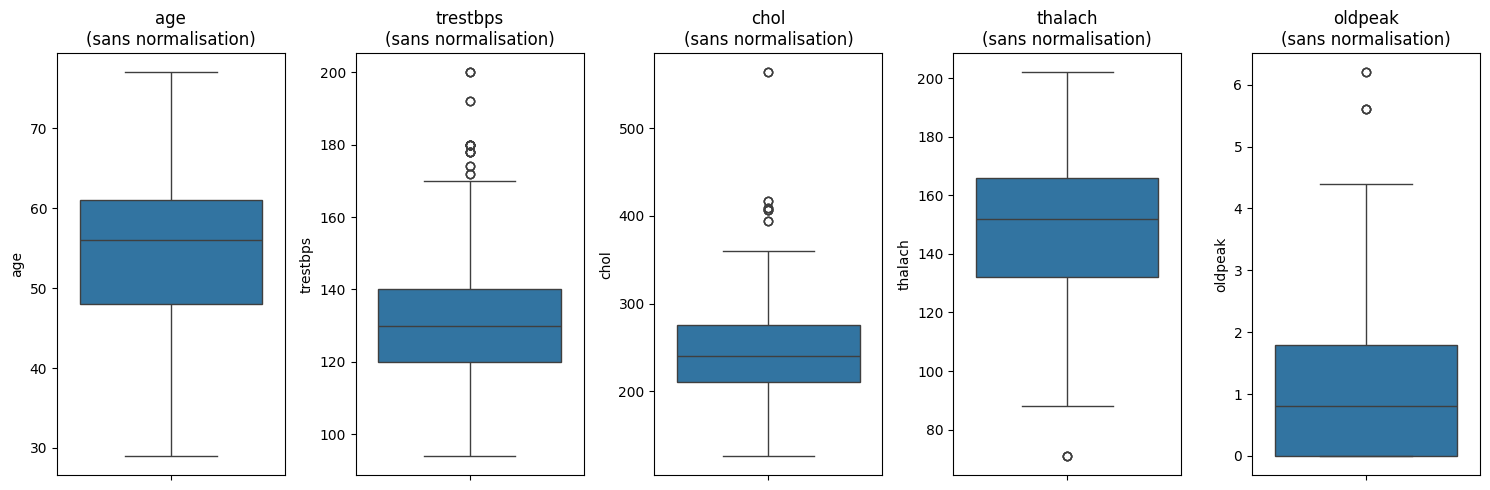

In [ ]:
#V´erification des valeurs manquantes
print("Valeurs manquantes par colonne:")
print(df.isnull().sum())
#V´erification des doublons
print("\nNombre de doublons:",df.duplicated().sum())
#Statistiques descriptives
print("\nStatistiques descriptives:")
print(df.describe())
#Visualisation des donn´ees num´eriques avant normalisation
plt.figure(figsize=(15, 5))
numeric_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
for i, col in enumerate(numeric_features):
  plt.subplot(1, 5,i+1)
  sns.boxplot(data=df, y=col)
  plt.title(f'{col}\n(sans normalisation)')
plt.tight_layout()
plt.show()

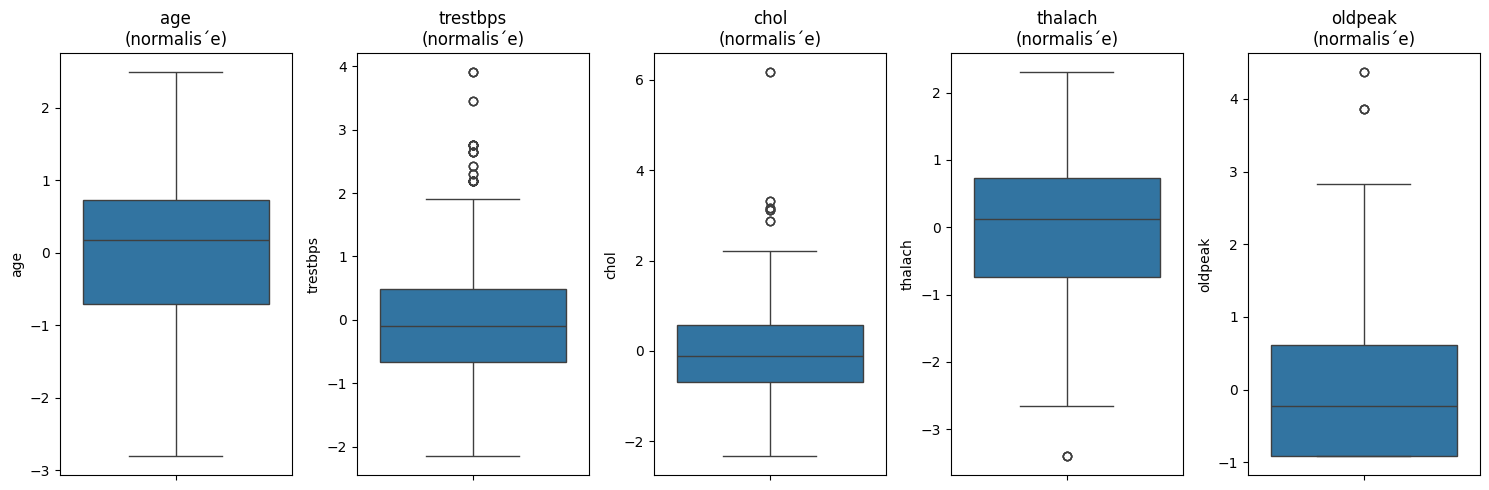

In [ ]:
numeric_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang',
'slope', 'ca', 'thal']
#Normalisation avec StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[numeric_features] = scaler.fit_transform(df[numeric_features])
#Visualisation de la distribution apr`es normalisation
plt.figure(figsize=(15, 5))
for i, col in enumerate(numeric_features):
  plt.subplot(1, 5,i+1)
  sns.boxplot(data=df, y=col)
  plt.title(f'{col}\n(normalis´e)')
plt.tight_layout()
plt.show()

Classes pour sex: {0: 'Female', 1: 'Male'}
Classes pour cp: {0: 'typical angina', 1: 'atypical angina', 2: 'non-anginal pain', 3: 'asymptomatic'}


In [ ]:
#Encodage avec LabelEncoder
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
for feature in categorical_features:
  df[feature] = encoder.fit_transform(df[feature])
  print(f"Classes pour {feature}:",
    dict(enumerate(encoder.classes_)))

Classes pour sex: {0: 0, 1: 1}
Classes pour cp: {0: 0, 1: 1, 2: 2, 3: 3}
Classes pour fbs: {0: 0, 1: 1}
Classes pour restecg: {0: 0, 1: 1, 2: 2}
Classes pour exang: {0: 0, 1: 1}
Classes pour slope: {0: 0, 1: 1, 2: 2}
Classes pour ca: {0: 0, 1: 1, 2: 2, 3: 3, 4: 4}
Classes pour thal: {0: 0, 1: 1, 2: 2, 3: 3}


In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
#Pr´eparation des donn´ees
X = df.drop('target',axis=1)
y = df['target']
#1. S´election univari´ee (SelectKBest)
selector = SelectKBest(score_func=f_classif, k=5)
X_selected = selector.fit_transform(X, y)
#Affichage des scores
scores = pd.DataFrame({
'Feature':X.columns,
'Score':selector.scores_
}).sort_values('Score',ascending=False)
print("Top 5 caract´eristiques (SelectKBest):")
print(scores.head())
#2. Elimination r´ecursive (RFE)´
rfe = RFE(estimator=RandomForestClassifier(random_state=42),
n_features_to_select=5)
rfe = rfe.fit(X, y)
#Affichage des r´esultats RFE
rfe_results = pd.DataFrame({
'Feature':X.columns,
'Selected':rfe.support_,
'Rank':rfe.ranking_
}).sort_values('Rank')
selectecd_features = list(rfe_results[rfe_results['Selected']]['Feature'])
print("\nCaract´eristiques s´electionn´ees (RFE):")
print(rfe_results[rfe_results['Selected']])

#2. Elimination r´ecursive (RFE)´
rfe = RFE(estimator=RandomForestClassifier(random_state=42),
  n_features_to_select=5)
rfe = rfe.fit(X, y)

#Affichage des r´esultats RFE
rfe_results = pd.DataFrame({
'Feature':X.columns,
'Selected':rfe.support_,
'Rank':rfe.ranking_
}).sort_values('Rank')
selectecd_features = list(rfe_results[rfe_results['Selected']]['Feature'])
print("\nCaract´eristiques s´electionn´ees (RFE):")
print(rfe_results[rfe_results['Selected']])

Top 5 caract´eristiques (SelectKBest):
    Feature       Score
9   oldpeak  243.450780
8     exang  242.883889
2        cp  238.558457
7   thalach  222.799538
11       ca  174.877078

Caract´eristiques s´electionn´ees (RFE):
    Feature  Selected  Rank
0       age      True     1
2        cp      True     1
7   thalach      True     1
9   oldpeak      True     1
12     thal      True     1

Caract´eristiques s´electionn´ees (RFE):
    Feature  Selected  Rank
0       age      True     1
2        cp      True     1
7   thalach      True     1
9   oldpeak      True     1
12     thal      True     1


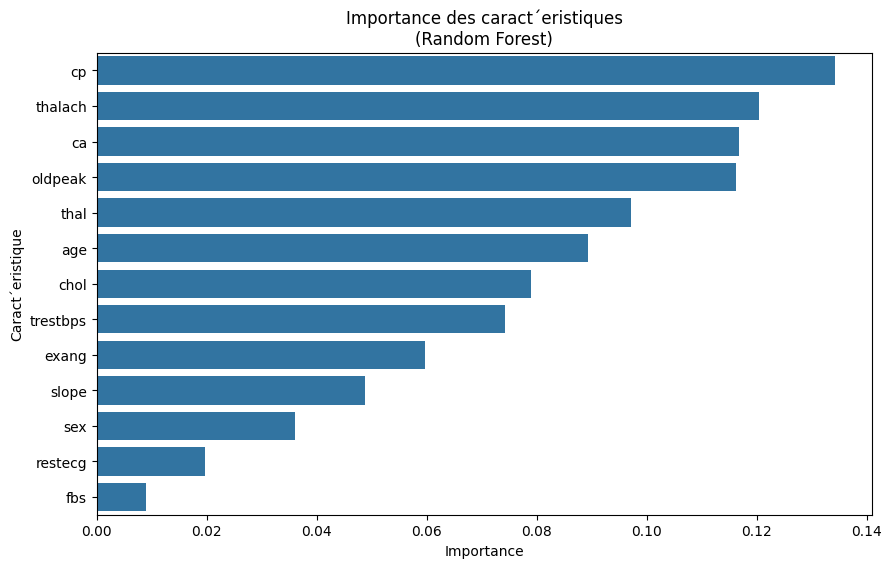

In [ ]:
#Utilisation de Random Forest pour l'importance des features
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)
#Cr´eation du graphique d'importance
importance = pd.DataFrame({
'feature':X.columns,
'importance':rf.feature_importances_
}).sort_values('importance',ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(data=importance, x='importance',y='feature')
plt.title('Importance des caract´eristiques\n(Random Forest)')
plt.xlabel('Importance')
plt.ylabel('Caract´eristique')
plt.show()

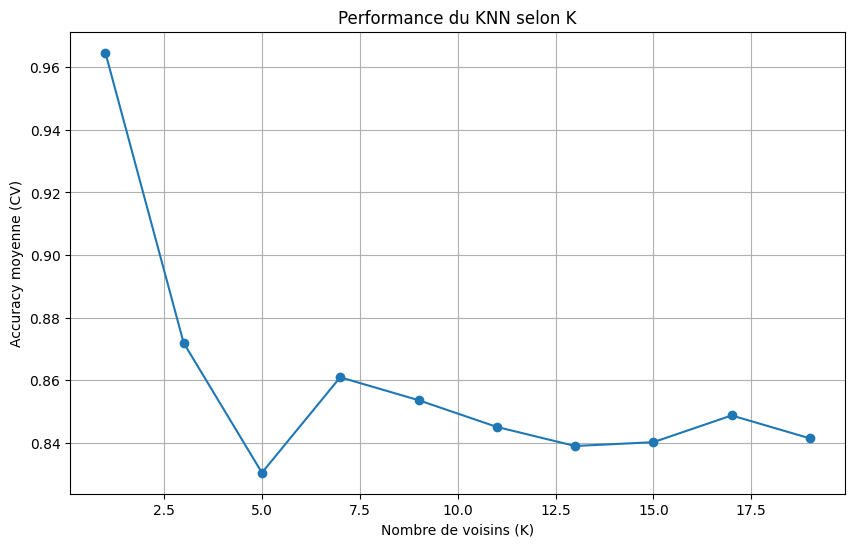

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
#S´eparation train/test
X_train, X_test, y_train, y_test = train_test_split(
X_selected, y, test_size=0.2,random_state=42)
#Test de diff´erentes valeurs de K
k_values = range(1, 21, 2)
cv_scores = []
for k in k_values:
  knn = KNeighborsClassifier(n_neighbors=k)
  scores = cross_val_score(knn, X_train, y_train,
  cv=5,scoring='accuracy')
  cv_scores.append(scores.mean())
#Visualisation des r´esultats
plt.figure(figsize=(10, 6))
plt.plot(k_values, cv_scores, marker='o')
plt.xlabel('Nombre de voisins (K)')
plt.ylabel('Accuracy moyenne (CV)')
plt.title('Performance du KNN selon K')
plt.grid(True)
plt.show()

Q2 . Interpr´etez les r´esultats


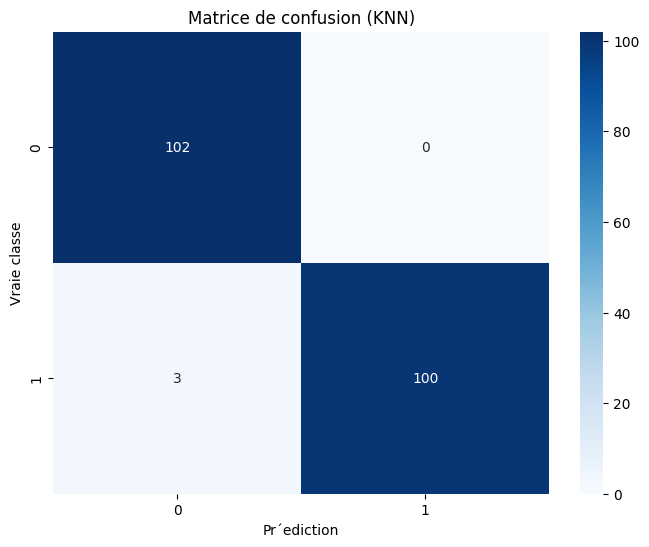


Rapport de classification:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



In [ ]:
#Utilisation du meilleur K
best_k = k_values[np.argmax(cv_scores)]
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
#Matrice de confusion
cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True,fmt='d',cmap='Blues')
plt.title('Matrice de confusion (KNN)')
plt.ylabel('Vraie classe')
plt.xlabel('Pr´ediction')
plt.show()
#Rapport de classification
print("\nRapport de classification:")
print(metrics.classification_report(y_test, y_pred))

Rapport de classification (Arbre):
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       102
           1       0.99      0.97      0.98       103

    accuracy                           0.98       205
   macro avg       0.98      0.98      0.98       205
weighted avg       0.98      0.98      0.98       205



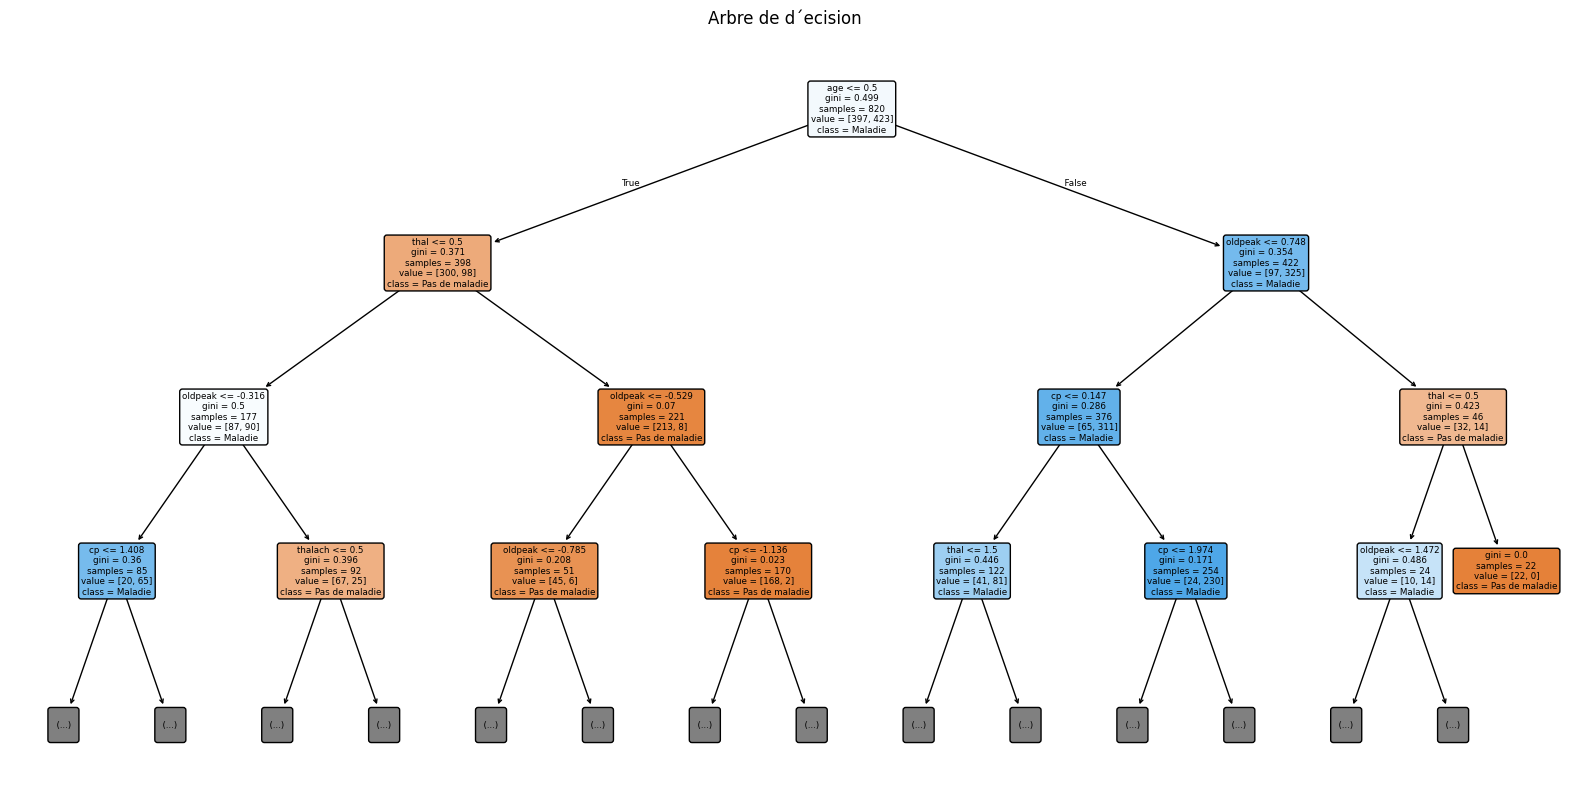

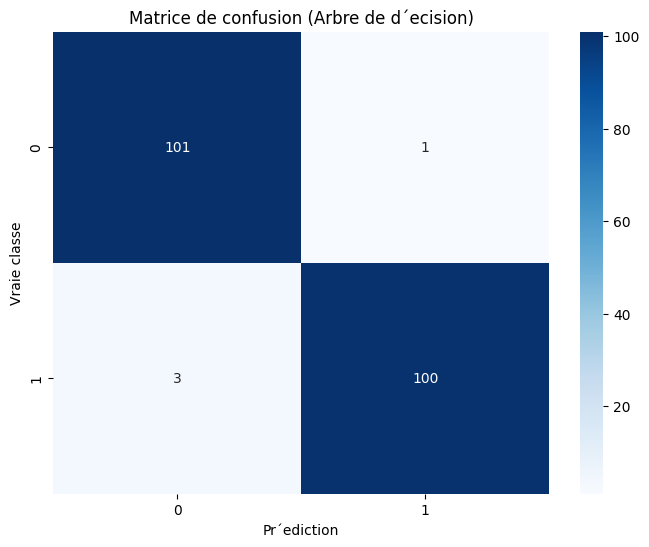

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
#Cr´eation de l'arbre
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)
#Visualisation de l'arbre
plt.figure(figsize=(20, 10))
plot_tree(tree,
feature_names=list(rfe_results['Feature']),
class_names=['Pas de maladie', 'Maladie'],
filled=True,
rounded=True,max_depth=3)
plt.title('Arbre de d´ecision')
# Evaluation´
y_pred_tree = tree.predict(X_test)
print("Rapport de classification (Arbre):")
print(metrics.classification_report(y_test, y_pred_tree))
plt.show()
cm = metrics.confusion_matrix(y_test, y_pred_tree)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True,fmt='d',cmap='Blues')
plt.title('Matrice de confusion (Arbre de d´ecision)')
plt.ylabel('Vraie classe')
plt.xlabel('Pr´ediction')
plt.show()

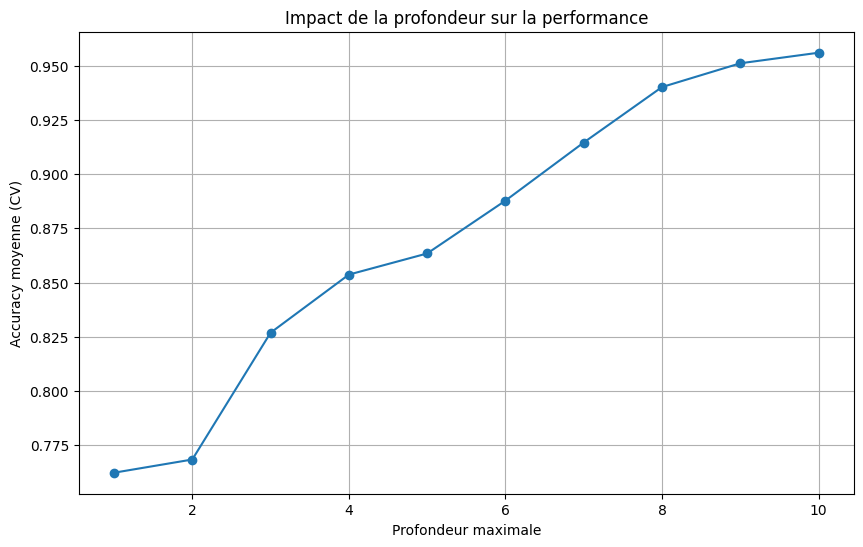

In [ ]:
#Test de diff´erentes profondeurs
max_depths = range(1, 11)
cv_scores_depth = []
for depth in max_depths:
  tree = DecisionTreeClassifier(max_depth=depth,
  random_state=42)
  scores = cross_val_score(tree, X_train, y_train,
  cv=5,scoring='accuracy')
  cv_scores_depth.append(scores.mean())
#Visualisation
plt.figure(figsize=(10, 6))
plt.plot(max_depths, cv_scores_depth, marker='o')
plt.xlabel('Profondeur maximale')
plt.ylabel('Accuracy moyenne (CV)')
plt.title('Impact de la profondeur sur la performance')
plt.grid(True)
plt.show()

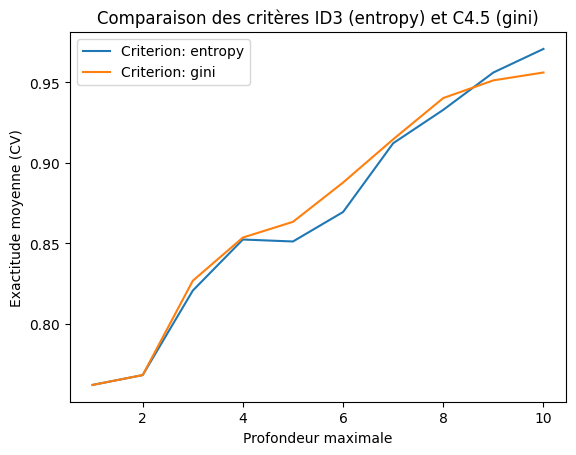

In [ ]:
criteria = ['entropy', 'gini']
for criterion in criteria:
    cv_scores = []
    for depth in range(1, 11):
        tree = DecisionTreeClassifier(
            criterion=criterion,
            max_depth=depth,
            random_state=42
        )
        scores = cross_val_score(tree, X_train, y_train, cv=5, scoring='accuracy')
        cv_scores.append(scores.mean())
    plt.plot(range(1, 11), cv_scores, label=f'Criterion: {criterion}')

plt.xlabel('Profondeur maximale')
plt.ylabel('Exactitude moyenne (CV)')
plt.title('Comparaison des critères ID3 (entropy) et C4.5 (gini)')
plt.legend()
plt.show()


<Figure size 1200x600 with 0 Axes>

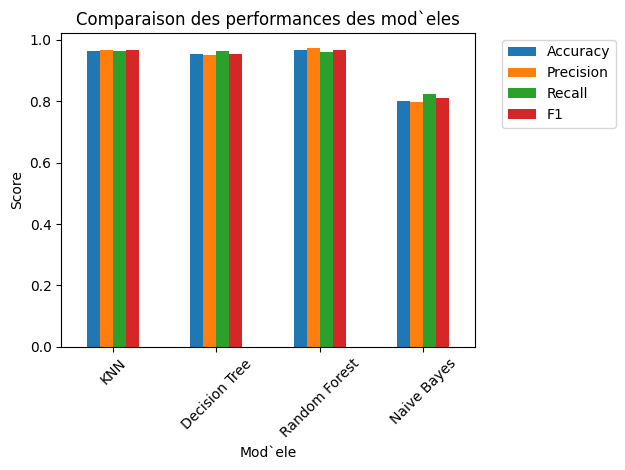

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_validate
#D´efinition des mod`eles
models = {
'KNN':KNeighborsClassifier(n_neighbors=best_k),
'Decision Tree':DecisionTreeClassifier(
max_depth=max_depths[np.argmax(cv_scores_depth)]),
'Random Forest':RandomForestClassifier(random_state=42),
'Naive Bayes':GaussianNB()
}
# Evaluation des mod`eles´
results = {}
for name, model in models.items():
  cv_results = cross_validate(
  model, X_train, y_train,
  cv=5,
  scoring=('accuracy', 'precision', 'recall', 'f1')
  ,return_estimator=True
  )
  models[name] = cv_results['estimator']
  results[name] = {
  metric: scores.mean()
  for metric, scores in cv_results.items()
  if metric.startswith('test_')
  }
#Visualisation des r´esultats
results_df = pd.DataFrame(results).T
results_df.columns = ['Accuracy', 'Precision', 'Recall', 'F1']
results_df = results_df.round(3)
plt.figure(figsize=(12, 6))
results_df.plot(kind='bar')
plt.title('Comparaison des performances des mod`eles')
plt.xlabel('Mod`ele')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

In [ ]:
def predict_heart_disease(model, patient_data):
  #Pr´etraitement des donn´ees du patient
  patient_df = pd.DataFrame([patient_data])
  #Application du m^eme pr´etraitement
  patient_df[numeric_features] = scaler.transform(
    patient_df[numeric_features])
  x = patient_df[selectecd_features].to_numpy()#Application du m^eme pr´etraitement
  #Pr´ediction
  prob = model.predict_proba(x)[0]
  prediction = model.predict(x)[0]
  return {
    'prediction': 'Maladie cardiaque' if prediction == 1
    else 'Pas de maladie',
    'probabilit´e':prob[1]
}
#Exemple d'utilisation
nouveau_patient = {
  'age': 55,
  'sex': 1,
  'cp': 0,
  'trestbps': 140,
  'chol': 250,
  'thalach': 20,
  'oldpeak':30,
  'thal' : 0 , 'ca':3, 'exang':1, 'slope':2, 'restecg':2, 'fbs':0
}
resultat = predict_heart_disease(
  models['Random Forest'][0],
  nouveau_patient
)
print("Pr´ediction:",resultat)

Pr´ediction: {'prediction': 'Pas de maladie', 'probabilit´e': 0.42}


Last question

In [ ]:
banking_data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'poutcome'],
      dtype='object')

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# 加载数据集
banking_data = pd.read_csv('new_train.csv')  # 替换为你的数据集路径
income_data = pd.read_csv('income_evaluation.csv')  # 替换为你的数据集路径

# 查看数据基本信息
print("Banking 数据集信息：")
print(banking_data.info())
print("\nIncome Classification 数据集信息：")
print(income_data.info())

# 数据清洗与预处理（如处理缺失值、编码分类变量等）
def preprocess_data(data):
    # 检查缺失值并填充
    data.fillna(method='ffill', inplace=True)

    # 编码分类变量
    categorical_cols = data.select_dtypes(include=['object']).columns
    for col in categorical_cols:
        data[col] = LabelEncoder().fit_transform(data[col])

    # 标准化数值变量
    numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns
    data[numeric_cols] = StandardScaler().fit_transform(data[numeric_cols])
    return data

# 预处理数据
X_banking = banking_data.drop('y', axis=1)
y_banking = (banking_data['y']== 'yes').astype(int)
X_banking = preprocess_data(X_banking)

y_income = (income_data[' income'] == ' <=50K').astype(int)
X_income = income_data.drop(' income', axis=1)  # 替换 'target' 为实际目标列名

X_income = preprocess_data(X_income)


Banking 数据集信息：
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32950 entries, 0 to 32949
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          32950 non-null  int64 
 1   job          32950 non-null  object
 2   marital      32950 non-null  object
 3   education    32950 non-null  object
 4   default      32950 non-null  object
 5   housing      32950 non-null  object
 6   loan         32950 non-null  object
 7   contact      32950 non-null  object
 8   month        32950 non-null  object
 9   day_of_week  32950 non-null  object
 10  duration     32950 non-null  int64 
 11  campaign     32950 non-null  int64 
 12  pdays        32950 non-null  int64 
 13  previous     32950 non-null  int64 
 14  poutcome     32950 non-null  object
 15  y            32950 non-null  object
dtypes: int64(5), object(11)
memory usage: 4.0+ MB
None

Income Classification 数据集信息：
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32

<ipython-input-4-cc26ac2cddac>:18: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)
<ipython-input-4-cc26ac2cddac>:18: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


In [5]:
# 检查列名是否正确
print("Banking Data Columns: ", banking_data.columns)
print("Income Data Columns: ", income_data.columns)

# 修复 fillna 警告
def preprocess_data(data):
    # 检查缺失值并填充
    data.ffill(inplace=True)  # 替换为推荐的 ffill 方法

    # 编码分类变量
    categorical_cols = data.select_dtypes(include=['object']).columns
    for col in categorical_cols:
        data[col] = LabelEncoder().fit_transform(data[col])

    # 标准化数值变量
    numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns
    data[numeric_cols] = StandardScaler().fit_transform(data[numeric_cols])

    return data

# 确保目标列名正确
y_income = (income_data[' income'] == ' >50K').astype(int)  # 替换 '实际目标列名' 为正确名称


Banking Data Columns:  Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')
Income Data Columns:  Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' income'],
      dtype='object')


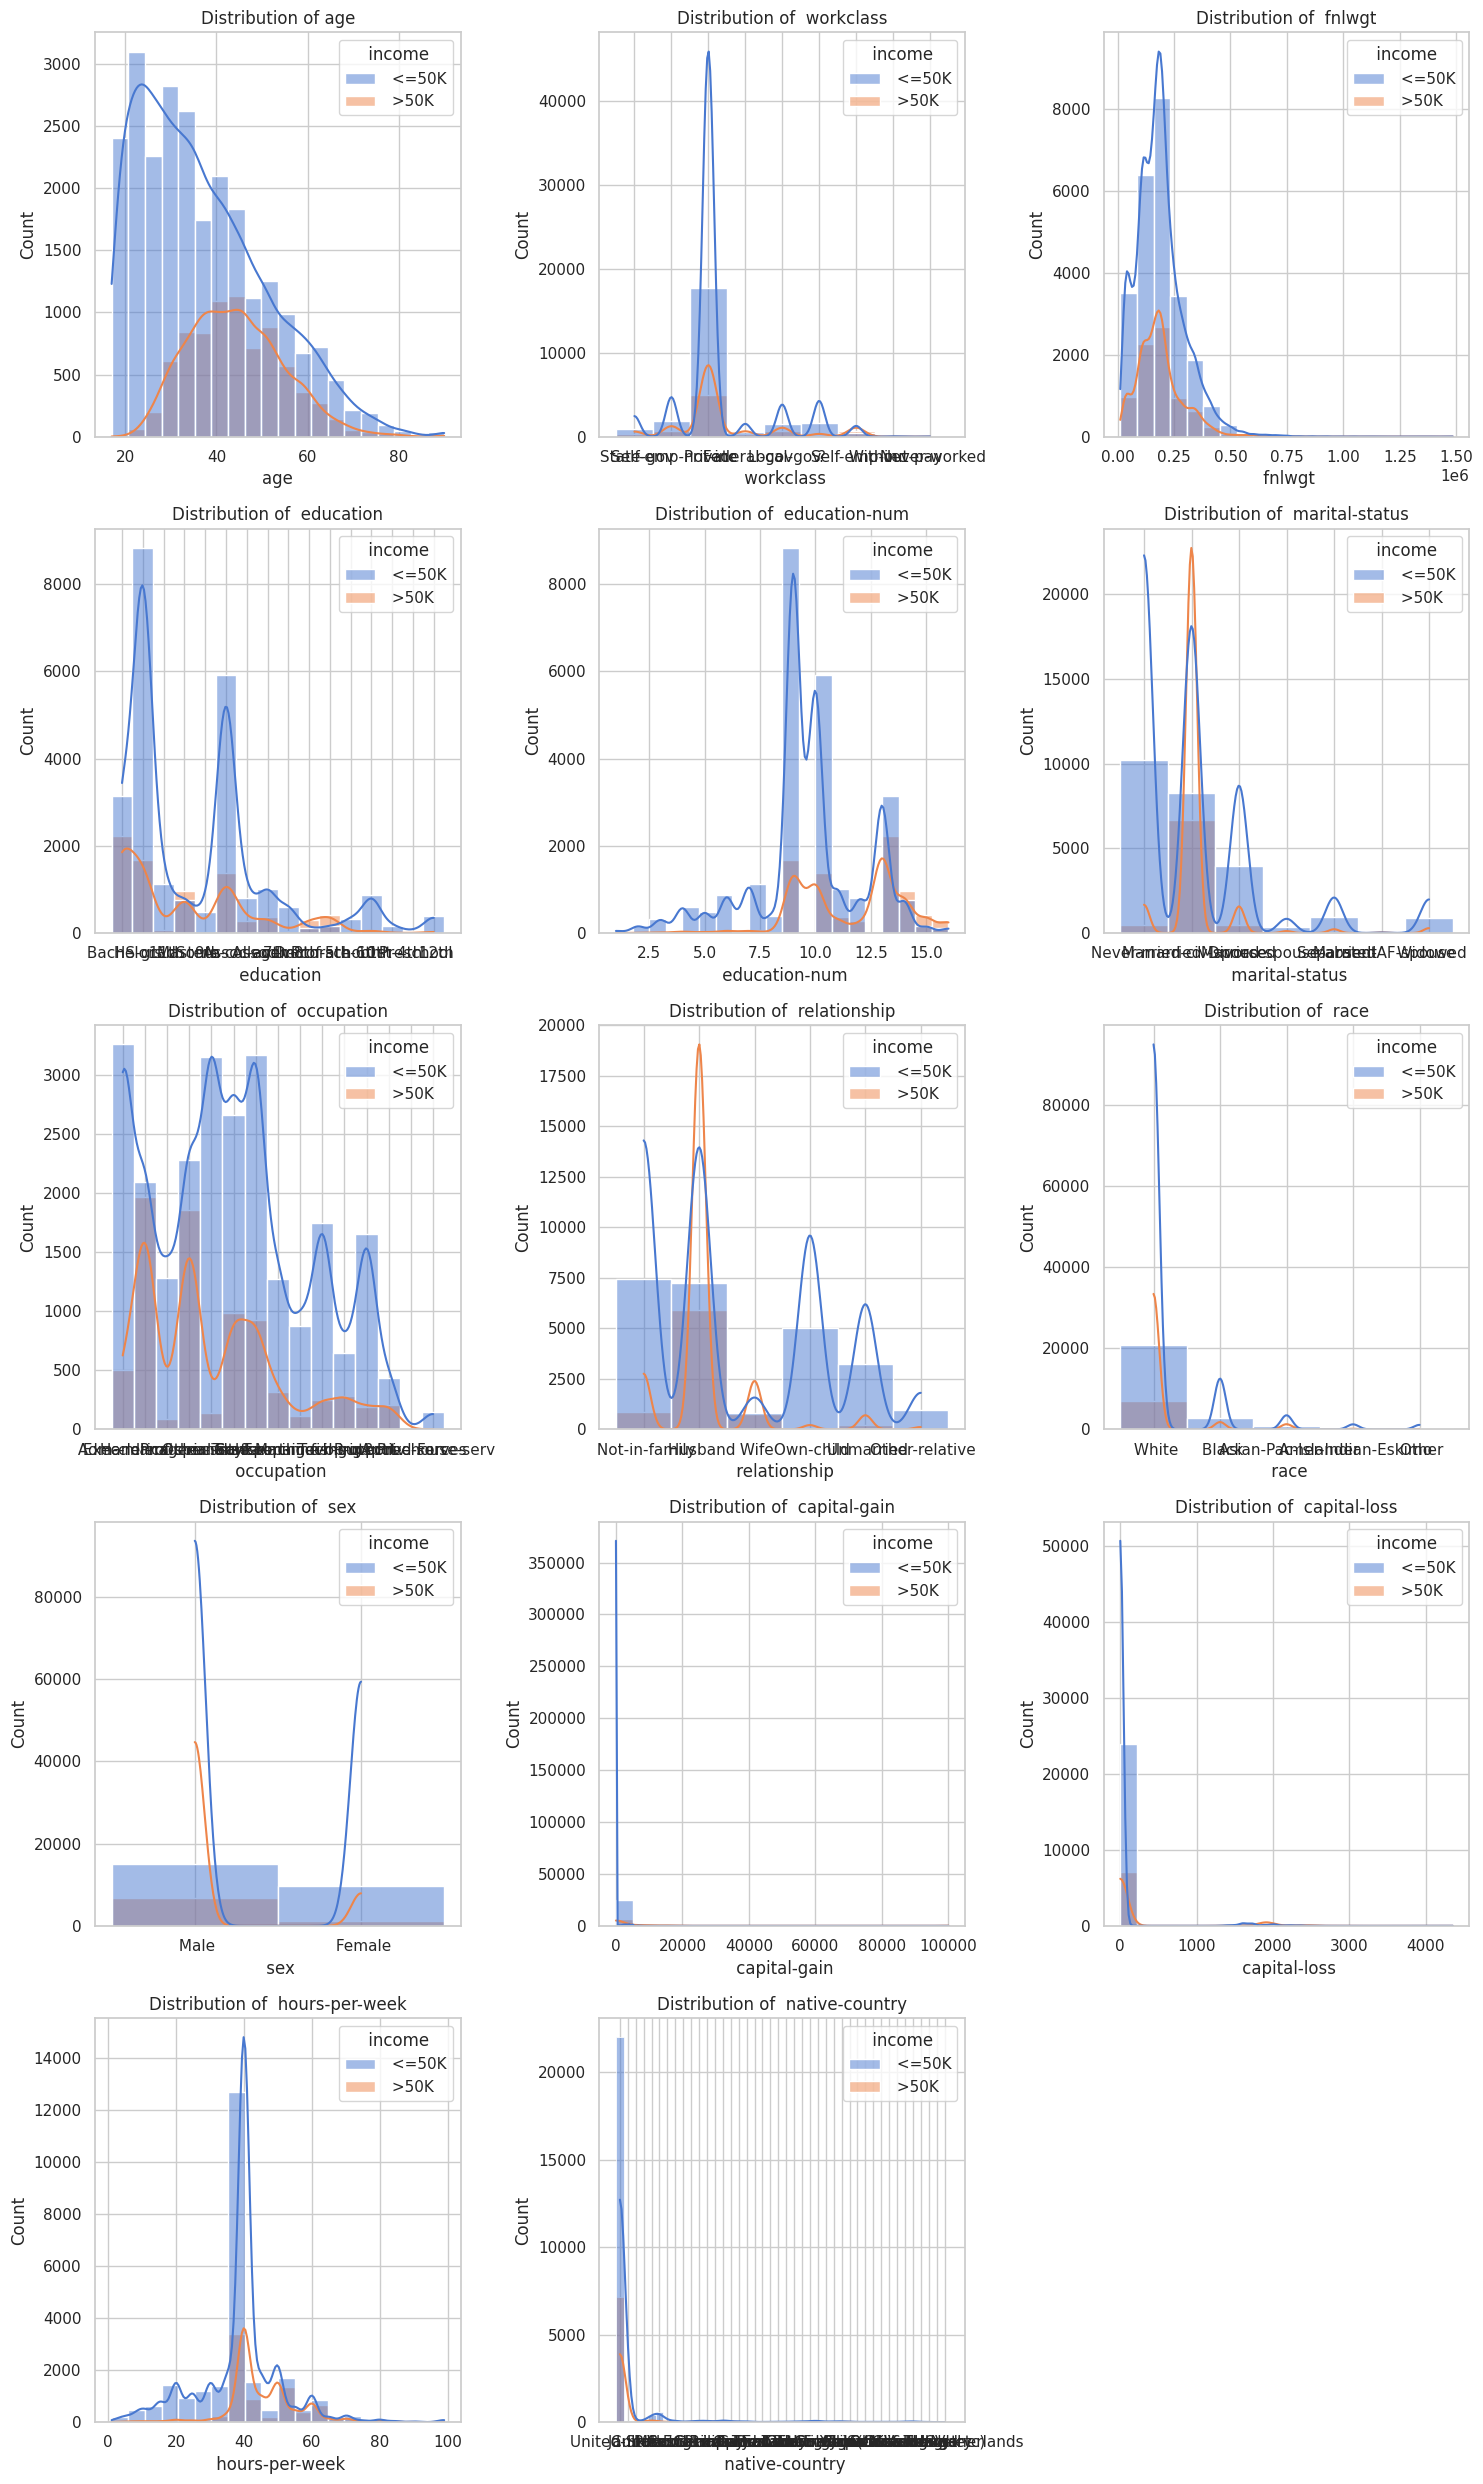

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# 示例特征和目标数据 (请替换为您的实际数据)
feature_columns = ['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country']  # 替换为实际的特征名称
X_income = income_data[feature_columns]  # 替换为特征数据
y_income = income_data[' income']  # 替换为目标列

# 设置绘图风格
sns.set(style="whitegrid")

# 创建子图布局
num_features = len(feature_columns)
plt.figure(figsize=(15, 5 * ((num_features + 2) // 3)))  # 自动调整布局大小

# 循环绘制每个特征的分布图
for i, col in enumerate(feature_columns):
    plt.subplot((num_features + 2) // 3, 3, i + 1)
    sns.histplot(data=X_income, x=col, hue=y_income, kde=True, bins=20, palette="muted")
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")

# 调整布局
plt.tight_layout()
plt.show()




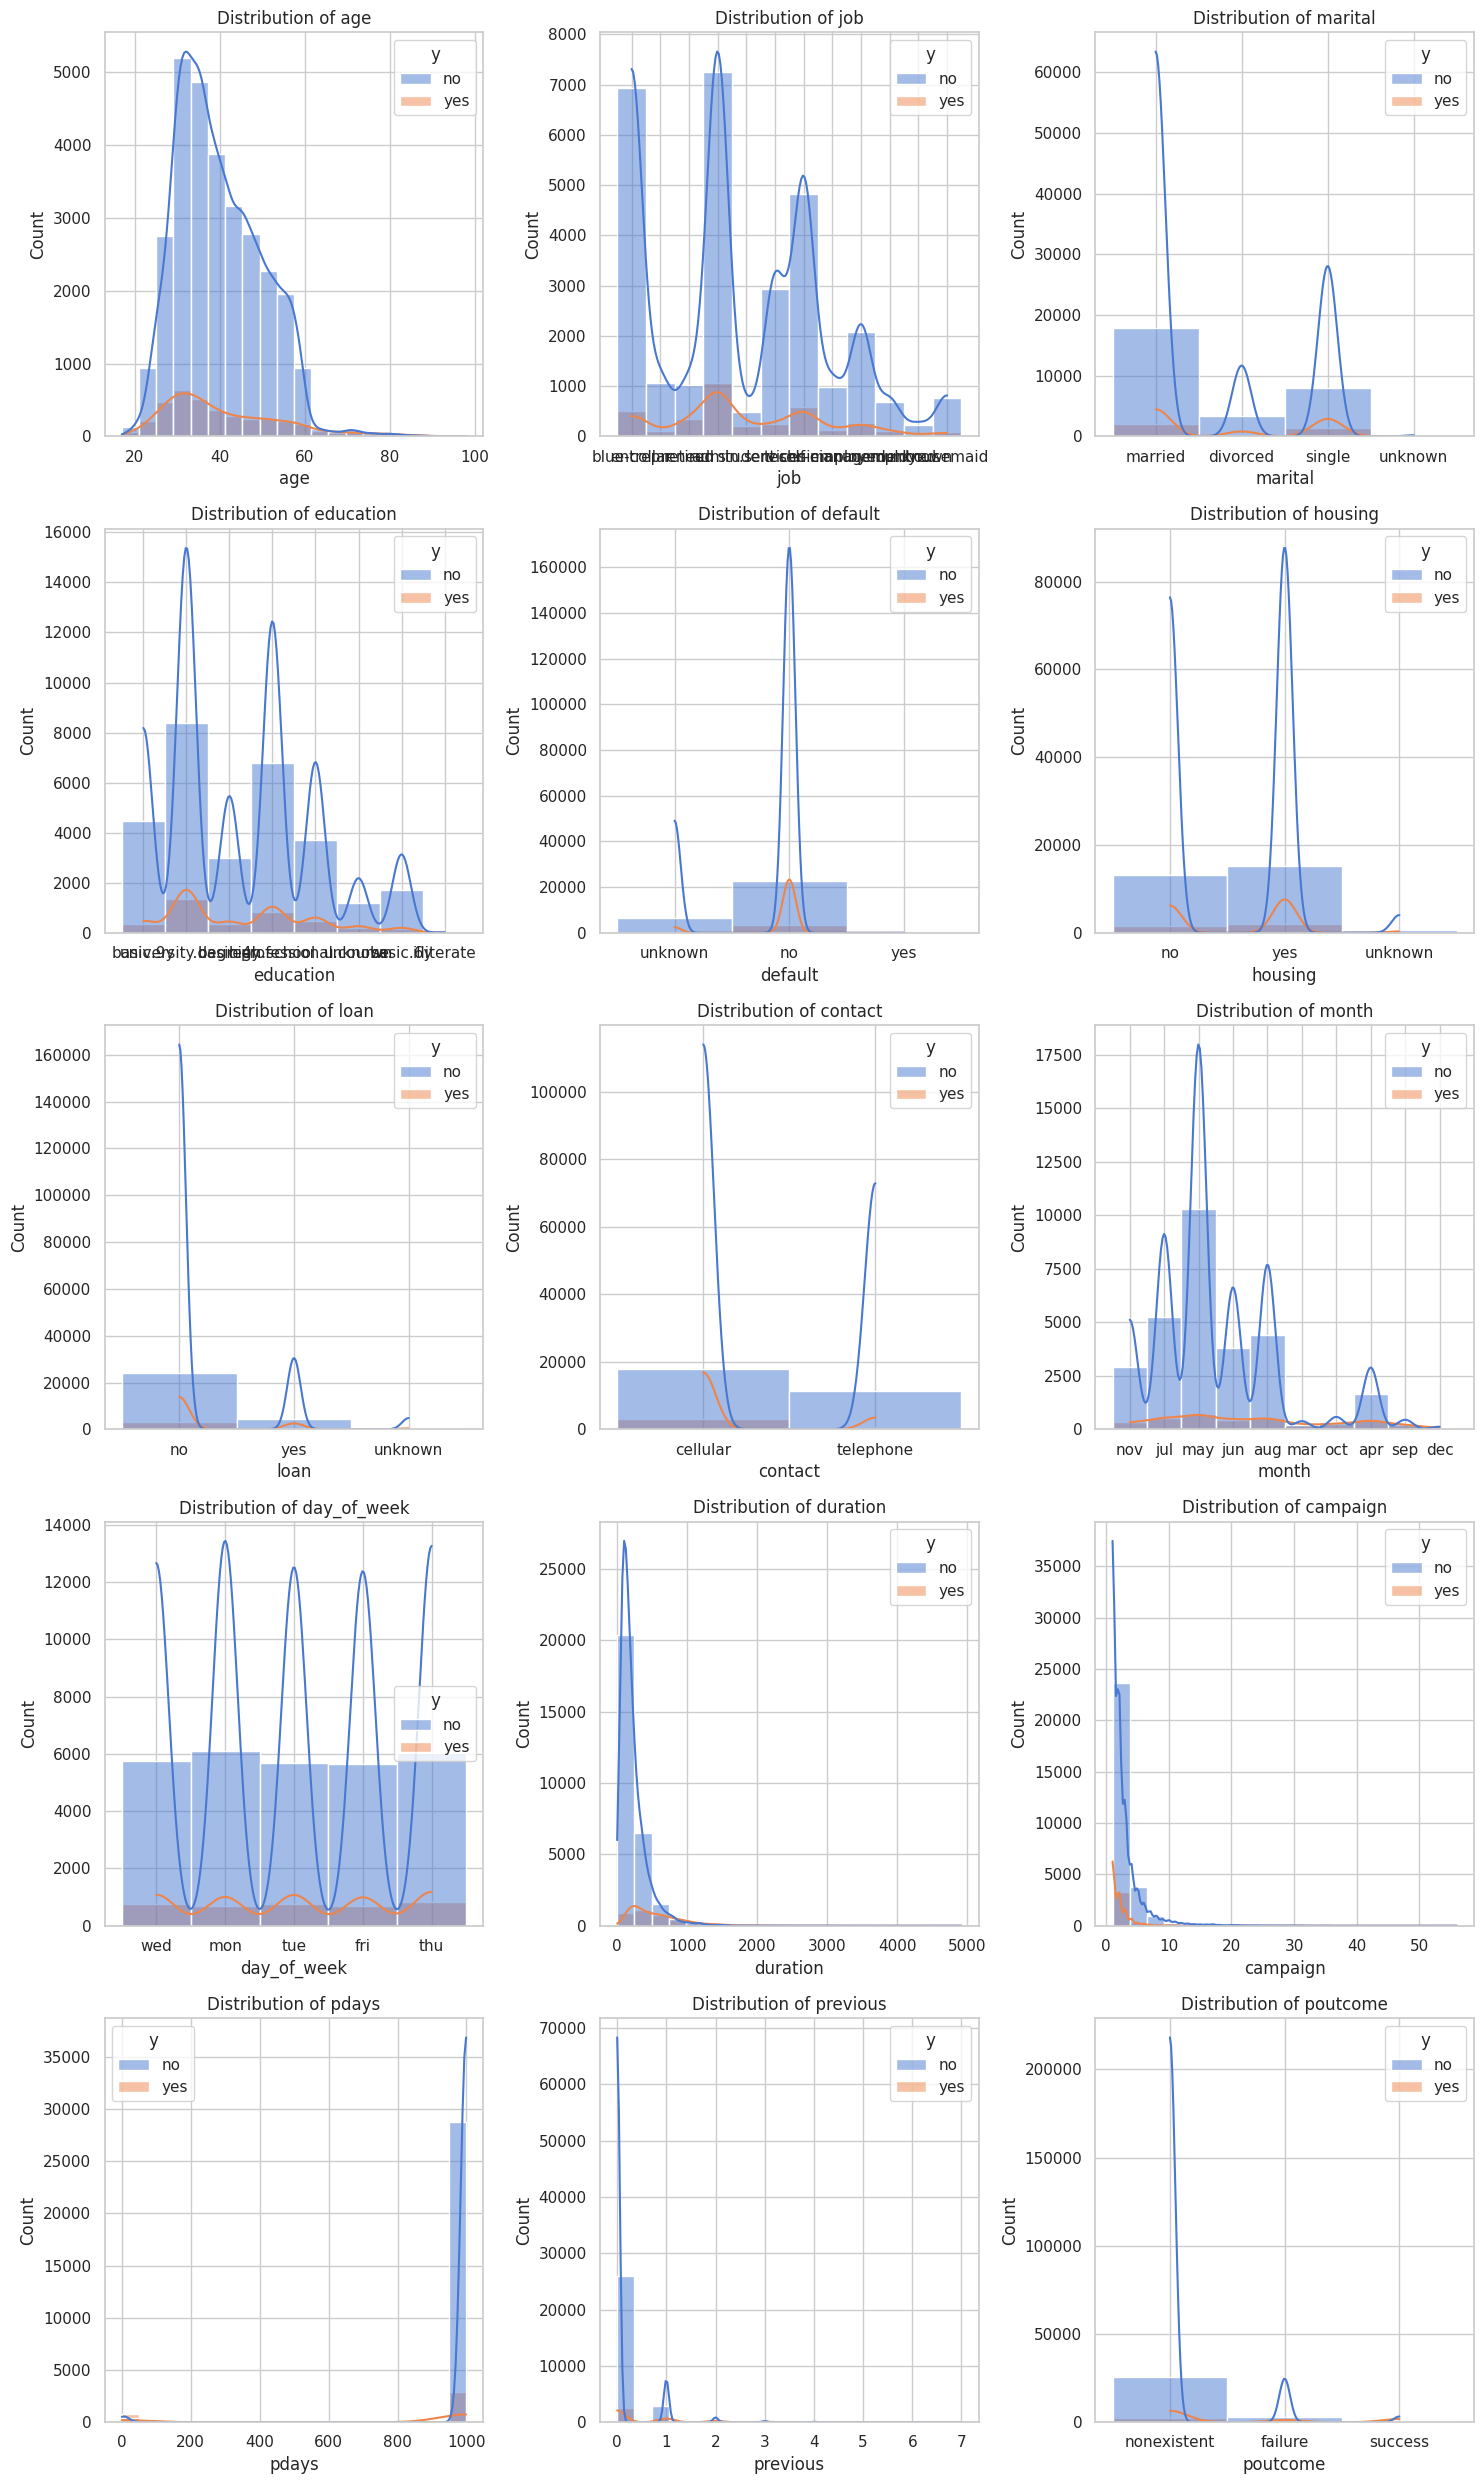

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# 示例特征和目标数据 (请替换为您的实际数据)
feature_columns = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome']  # 替换为实际的特征名称
X_income = banking_data[feature_columns]  # 替换为特征数据
y_income = banking_data['y']  # 替换为目标列

# 设置绘图风格
sns.set(style="whitegrid")

# 创建子图布局
num_features = len(feature_columns)
plt.figure(figsize=(15, 5 * ((num_features + 2) // 3)))  # 自动调整布局大小

# 循环绘制每个特征的分布图
for i, col in enumerate(feature_columns):
    plt.subplot((num_features + 2) // 3, 3, i + 1)
    sns.histplot(data=X_income, x=col, hue=y_income, kde=True, bins=20, palette="muted")
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")

# 调整布局
plt.tight_layout()
plt.show()

In [ ]:

X_train_banking, X_test_banking, y_train_banking, y_test_banking = train_test_split(
    X_banking, y_banking, test_size=0.2, random_state=42, stratify=y_banking
)

X_train_income, X_test_income, y_train_income, y_test_income = train_test_split(
    X_income, y_income, test_size=0.2, random_state=42, stratify=y_income
)


In [ ]:
income_data[' income'][0], banking_data['y'][0]

(' <=50K', 'no')

In [ ]:
(banking_data['y']== 'yes').astype(int)

,y
0,0
1,0
2,1
3,0
4,0
...,...
32945,0
32946,0
32947,0
32948,0


In [ ]:
#print(y_train_income.head())
#print(y_train_income.dtypes)
print(y_train_banking.unique(), y_test_banking.unique())


[1 0] [0 1]


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix

# 定义模型
models = {
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Decision Tree': DecisionTreeClassifier(max_depth=5, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Naive Bayes': GaussianNB()
}

# 训练与评估函数
def train_and_evaluate(models, X_train, y_train, X_test, y_test, dataset_name):
    results = {}
    models = models.copy()
    for name, model in models.items():
        # 训练模型
        model.fit(X_train, y_train)
        # 预测结果
        y_pred = model.predict(X_test)
        # 评估性能
        print(f"\n{dataset_name} - {name} model classification report：")
        print(classification_report(y_test, y_pred))
        print(f"{dataset_name} - {name} 混淆矩阵：")
        print(confusion_matrix(y_test, y_pred))
        # 保存准确率
        results[name] = model.score(X_test, y_test)
    return results

# 评估 Banking 数据集
banking_results = train_and_evaluate(models, X_train_banking, y_train_banking, X_test_banking, y_test_banking, "Banking")

# 评估 Income Classification 数据集
income_results = train_and_evaluate(models, X_train_income, y_train_income, X_test_income, y_test_income, "Income Classification")



Banking - KNN model classification report：
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      5848
           1       0.59      0.31      0.40       742

    accuracy                           0.90      6590
   macro avg       0.76      0.64      0.67      6590
weighted avg       0.88      0.90      0.88      6590

Banking - KNN 混淆矩阵：
[[5693  155]
 [ 515  227]]

Banking - Decision Tree model classification report：
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      5848
           1       0.65      0.36      0.47       742

    accuracy                           0.91      6590
   macro avg       0.79      0.67      0.71      6590
weighted avg       0.89      0.91      0.89      6590

Banking - Decision Tree 混淆矩阵：
[[5701  147]
 [ 472  270]]

Banking - Random Forest model classification report：
              precision    recall  f1-score   support

           0       0.92      0.97  

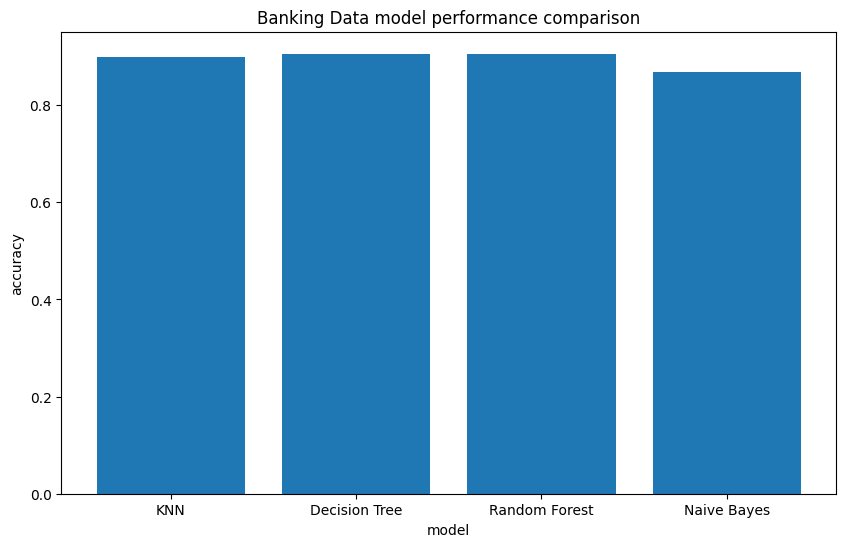

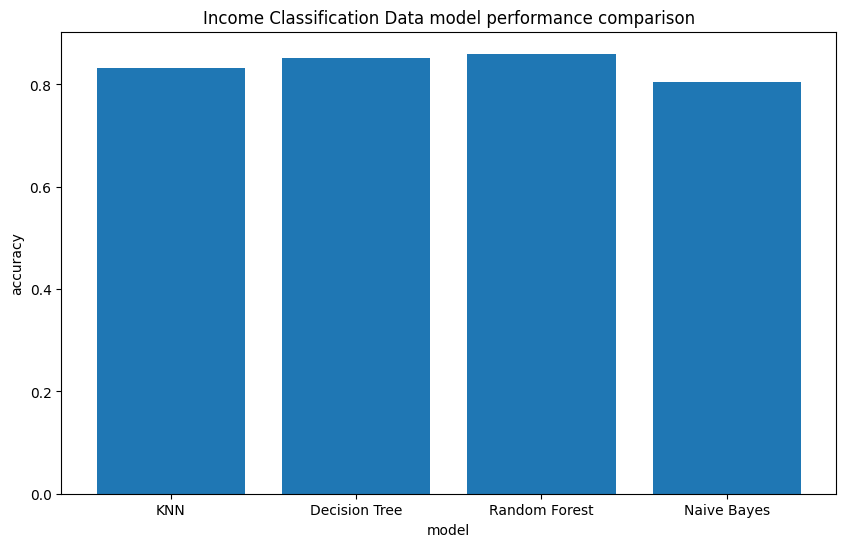

In [ ]:
import matplotlib.pyplot as plt

# 绘制柱状图比较模型性能
def plot_results(results, dataset_name):
    plt.figure(figsize=(10, 6))
    plt.bar(results.keys(), results.values())
    plt.title(f"{dataset_name} Data model performance comparison")
    plt.xlabel("model")
    plt.ylabel("accuracy")
    plt.show()

plot_results(banking_results, "Banking")
plot_results(income_results, "Income Classification")
